# EDA

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To display all columns of the DataFrame
pd.set_option('display.max_columns', None)

# To make the visualizations look better
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('CVD_cleaned.csv')


In [18]:
# Check basic info
df.info()

# Display first 5 rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [19]:
# Display summary statistics for numerical columns
df.describe()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [21]:

# Check for missing values
df.isnull().sum()


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

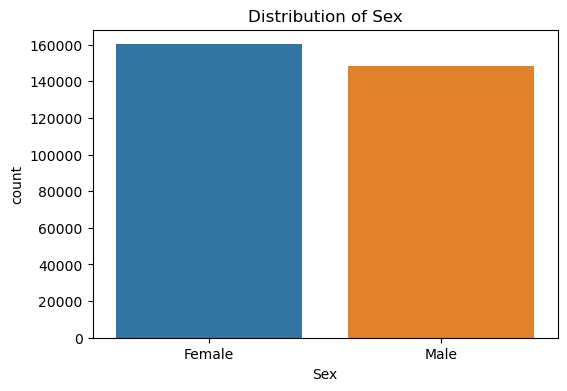

In [13]:
# Plotting target variable distribution
target_var = 'Sex' 

plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_var)
plt.title(f"Distribution of {target_var}")
plt.show()


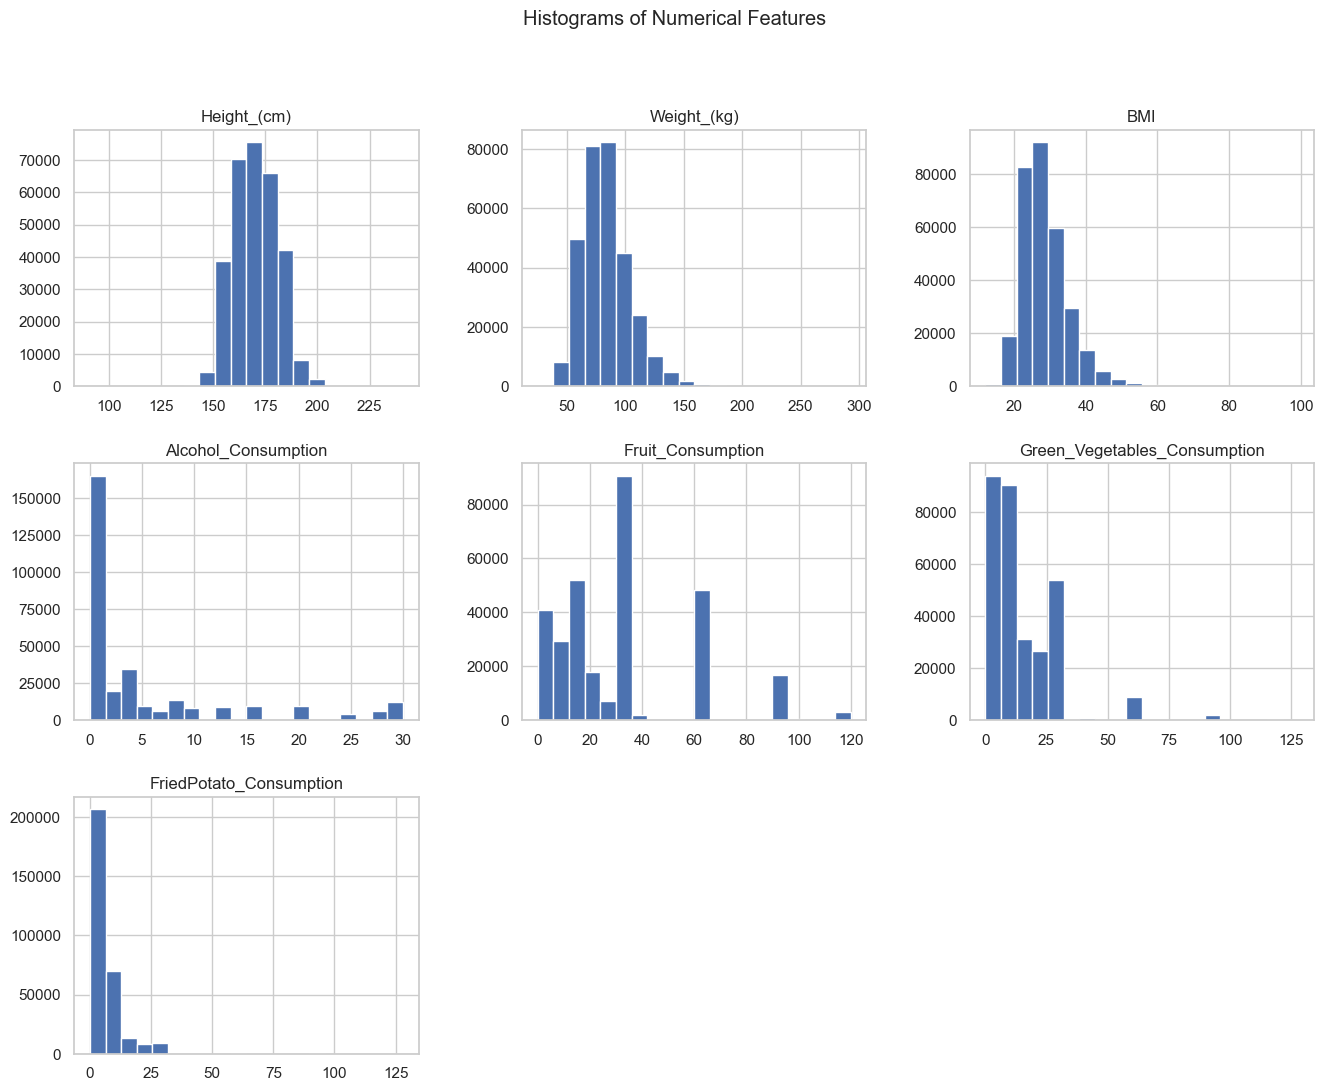

In [23]:
# Plot histograms of all numerical columns
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


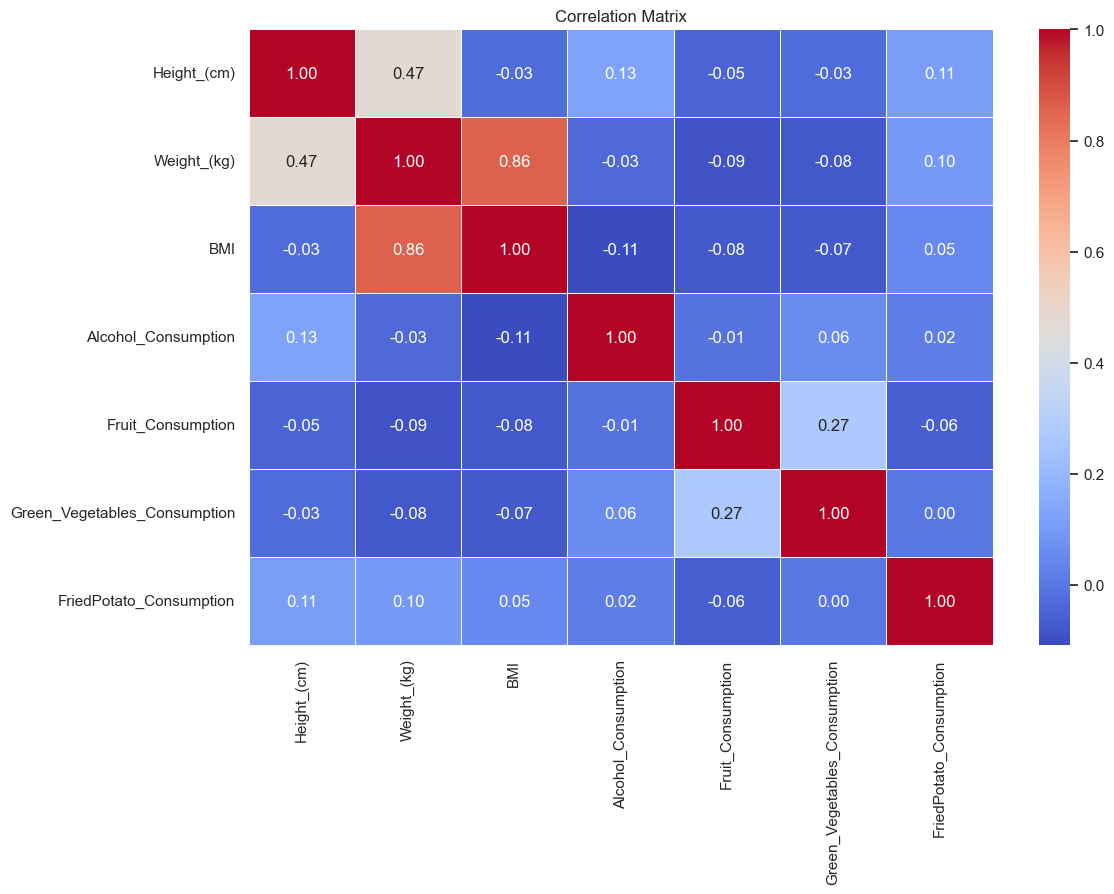

In [28]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


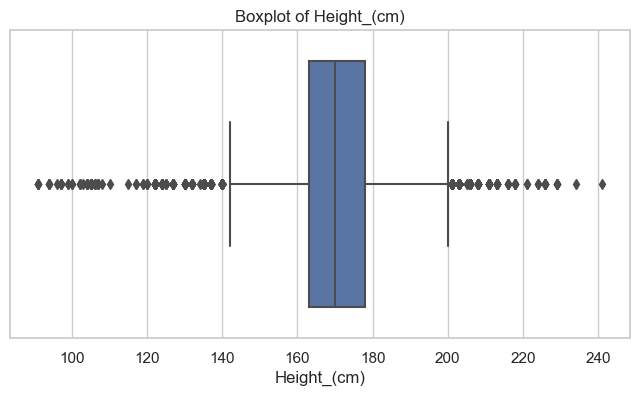

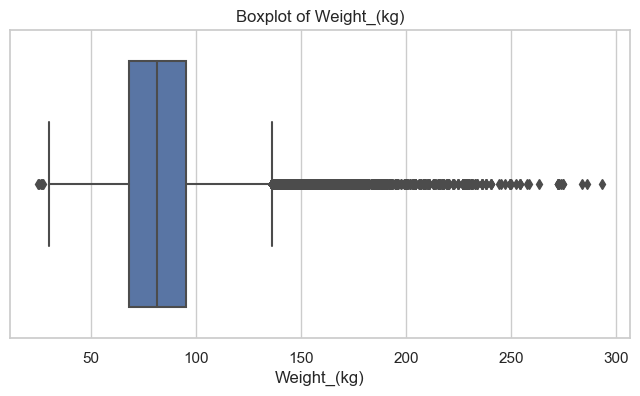

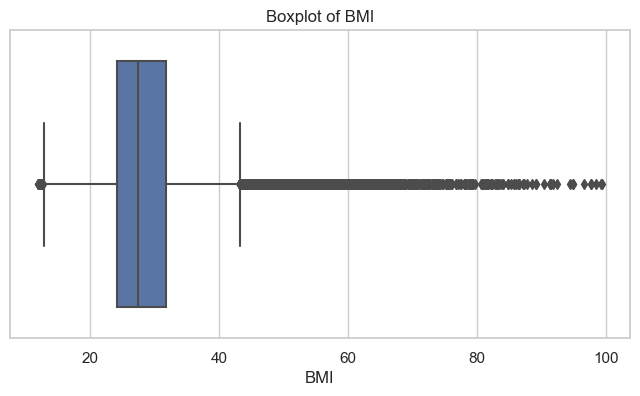

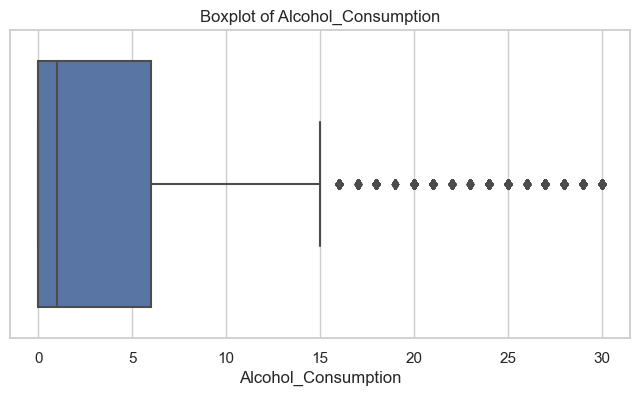

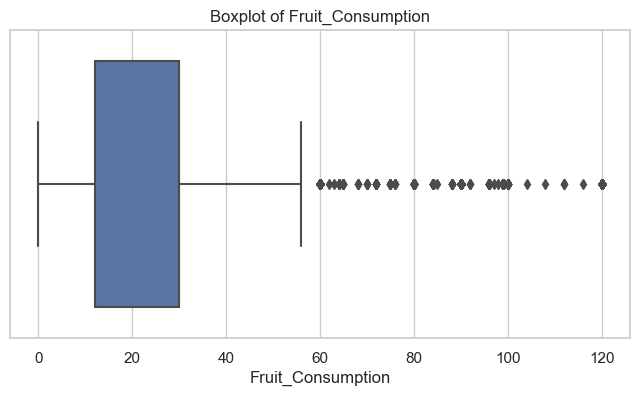

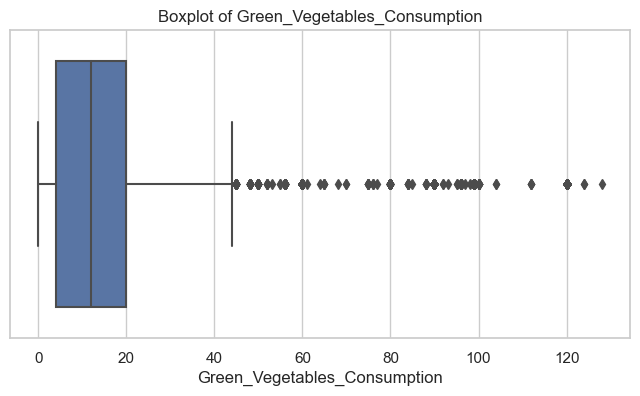

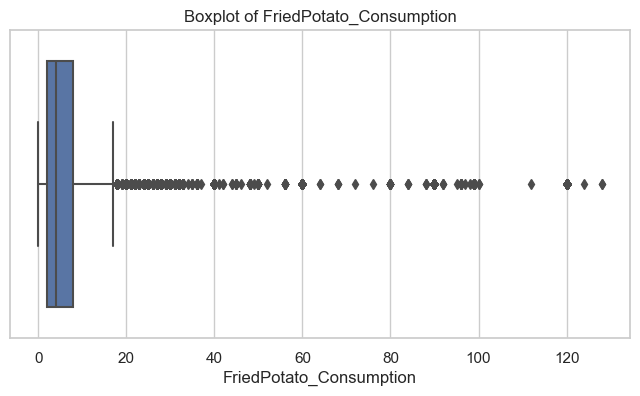

In [25]:
# Plotting boxplots for numerical features to identify outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


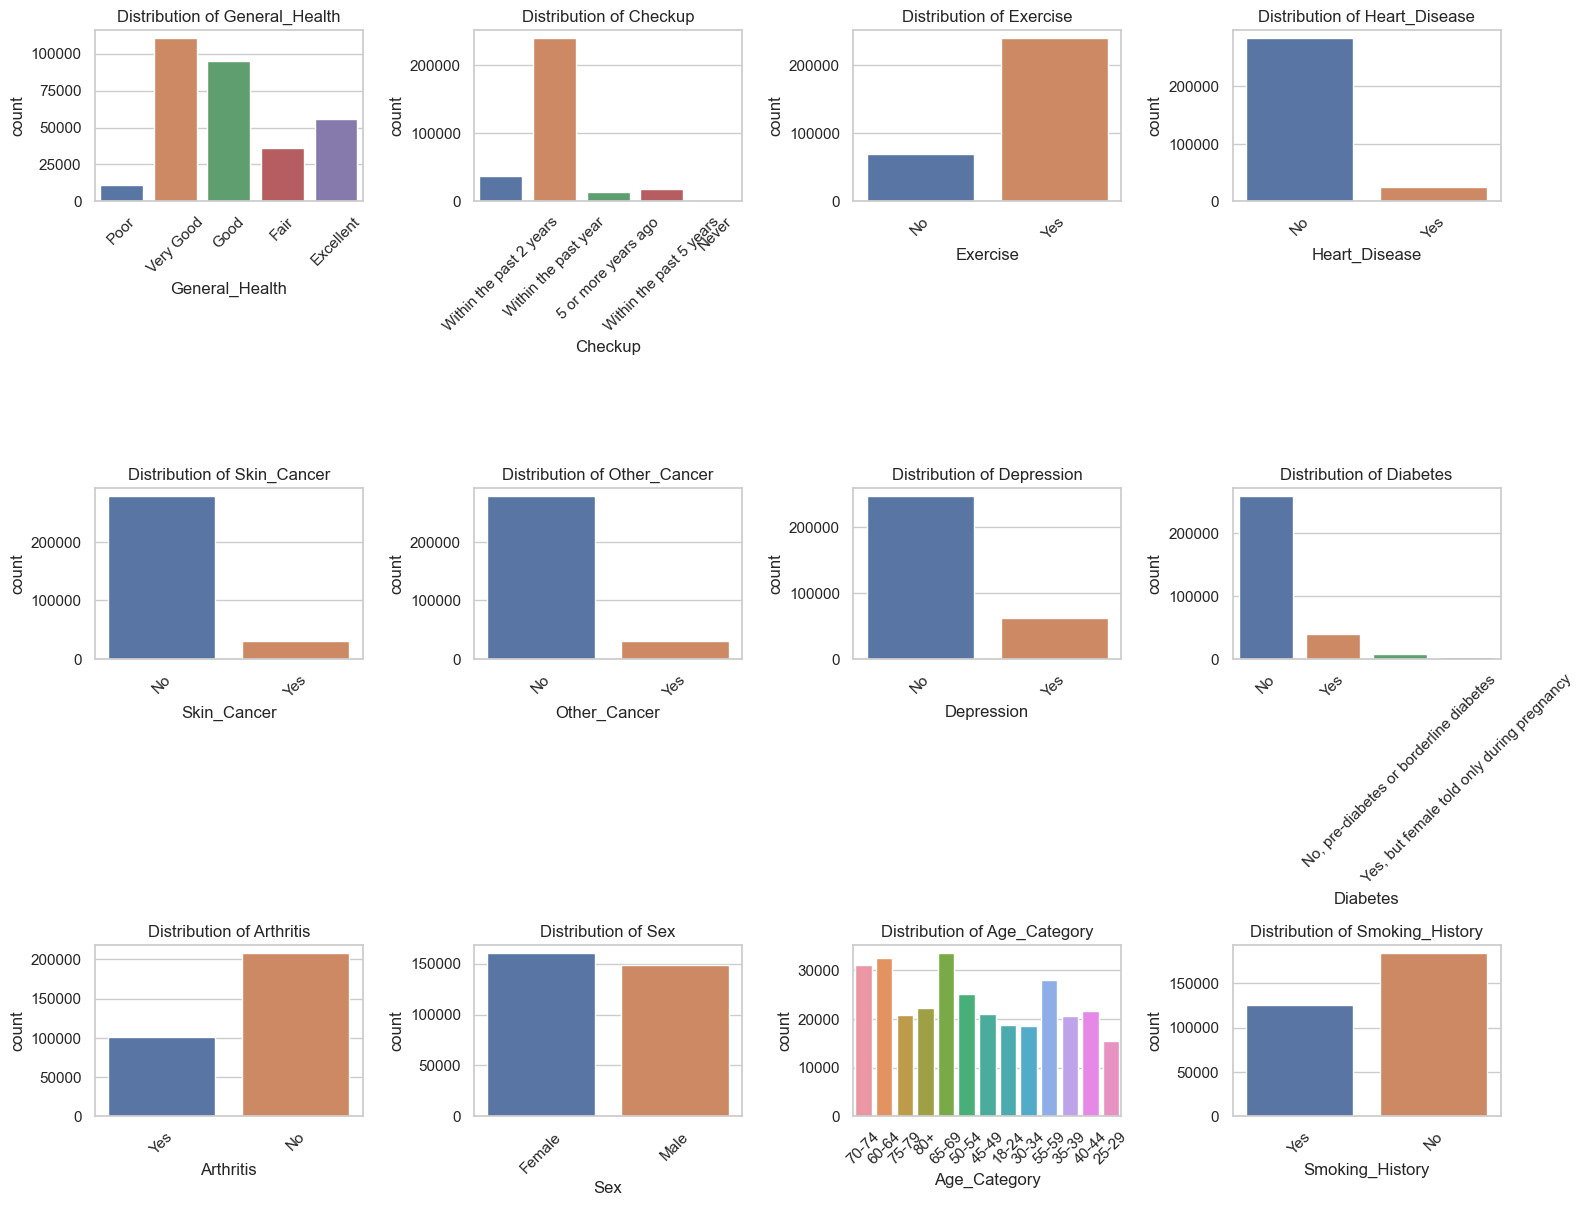

In [27]:
# Plot count plots for all categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Set the number of rows and columns for the grid (4x4)
n_cols = 4
n_rows = 4

# Loop through categorical columns in chunks of 16 (4x4 grid)
for i in range(0, len(categorical_columns), n_cols * n_rows):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))  # Set figure size for 4x4 grid
    
    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Loop through the chunk of 16 categorical columns
    for j, col in enumerate(categorical_columns[i:i + n_cols * n_rows]):
        sns.countplot(data=df, x=col, ax=axes[j])
        axes[j].set_title(f"Distribution of {col}")
        axes[j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Remove any unused subplots (if not a perfect multiple of 16)
    for j in range(len(categorical_columns[i:i + n_cols * n_rows]), n_cols * n_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



In [31]:
# Display unique age categories
unique_age_categories = df['Age_Category'].unique()
print("Unique Age Categories:", unique_age_categories)

Unique Age Categories: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
